## Kakuro Matrix

In [1]:
from gurobipy import *


# 13 x 13 Kakuro Puzzle
kakuro_matrix = [[(None,None),(None,None),(None,None), (None,None), (None,None), (15,None), (16,None), (None, None), (None,None), (None,None), (None,None), (None,None), (None,None)],
                [(None,None),(None,None),(None,None), (None,None), (4,8), 0,0, (4, None), (16,None), (None,None), (None,None), (None,None), (None,None)],
               [(None,None),(None,None),(11,None), (16,22), 0, 0, 0,0,0, (10,None), (None,None), (3,None), (17,None)],
                [(None,None),(None,16),0,0,0,0, (29, 13), 0,0,0, (23,11), 0,0],
               [(None,None),(4,8),0,0, (None,13), 0,0, (None, None), (16,19), 0,0,0,0],
               [(None,4),0,0, (None,None), (None,12), 0,0, (11, 19), 0,0,0, (None,None), (None,None)],
               [(None,8),0,0, (6,None), (11,None), (16,27), 0,0,0,0,0, (30,None), (17,None)],
              [(None,None),(None,None),(None,26), 0,0,0,0,0, (35,None), (None,None), (None,15), 0,0],
               [(None,None),(16,None),(4,11), 0,0,0, (None,11), 0,0, (None,None), (3,17), 0,0],
                 [(None,18),0,0,0,0, (17,None), (4,8), 0,0, (16,11), 0,0, (None,None)],
                 [(None,8),0,0, (None,13), 0,0,0, (4, 21), 0,0,0,0, (None,None)],
                 [(None,None),(None,None),(None,None), (None,None), (None,28), 0,0,0,0,0, (None,None), (None,None), (None,None)],
                 [(None,None),(None,None),(None,None), (None,None), (None,None), (None,None), (None,7), 0,0, (None,None), (None,None), (None,None), (None,None)]
              ]

# 20 x 20 Kakuro Puzzle (Since, 20x20 matrix will exceed the number of constraints allowed on Gurobi free version, 
# one will have to use the gurobi premium license key to run the model for this specific matrix)

# kakuro_matrix = [
#     [(None, None), (None, None), (None, None),(None,None) ,(16, None), (17, None), (None, None), (None, None), (None, None), (None, None), (None, None), (35, None), (17, None), (3, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)],
#     [(None, None), (None, None), (4, None), (6, 16), 0, 0, (None, None), (None, None), (16, None), (3, None), (None, 14), 0, 0, 0, (16, None), (4, None), (None, None), (None, None), (None, None), (None, None)],
#     [(None, None), (None, 20), 0, 0, 0, 0, (3, None), (16, 5), 0, 0, (16, 27), 0, 0, 0, 0, 0, (16, None), (None, None), (None, None), (None, None)],
#     [(None, None), (None, 4), 0, 0, (24, None), (None, 28), 0, 0, 0, 0, 0, 0, (4, None), (None, 19), 0, 0, 0, (3, None), (None, None), (None, None)],
#     [(None, None), (None, None), (None, 12), 0, 0, (7, 12), 0, 0, 0, (24, 19), 0, 0, 0, (None, None), (None, None), (None, 11), 0, 0, (23, None), (None, None)],
#     [(None, None), (None, None), (32, None), (4, 10), 0, 0, (None, None), (24, 15), 0, 0, (None, 8), 0, 0, (None, None), (None, None), (4, None), (22, 10), 0, 0, (3, None)],
#     [(None, None), (None, 16), 0, 0, 0, 0, (4, 17), 0, 0, 0, (17, None), (None, None), (None, None), (None, None), (None, 7), 0, 0, (10, 10), 0, 0],
#     [(None, None), (13, 6), 0, 0, (None, 11), 0, 0, 0, (None, 17), 0, 0, (20, None), (None, None), (17, None), (4, 23), 0, 0, 0, 0, 0],
#     [(None, 16), 0, 0, (None, None), (3, None), (16, 10), 0, 0, (23, None), (13, 17), 0, 0, (23, 9), 0, 0, (None, 9), 0, 0, (21, None), (29, None)],

#     [(None, 3), 0, 0, (10, 11), 0, 0, (None, None), (None, 10), 0, 0, (None, 25), 0, 0, 0, 0, (17, None), (4, 16), 0, 0, 0],
#     [(None, 21), 0, 0, 0, 0, 0, (17, None), (16, 11), 0, 0, (None, 13), 0, 0, (None, None), (None, 21), 0, 0, 0, 0, 0],
#     [(None, 12), 0, 0, 0, (23, None), (None, 24), 0, 0, 0, 0, (4, 8), 0, 0, (24, None), (4, 10), 0, 0, (None, 11), 0, 0],
#     [(None, None), (17, None), (6, 11), 0, 0, (16, 17), 0, 0, (None, 8), 0, 0, (24, None), (None, 12), 0, 0, (7, None), (None, None), (16, 8), 0, 0],
#     [(None, 28), 0, 0, 0, 0, 0, (None, None), (None, None), (None, None), (None, 12), 0, 0, (15, 10), 0, 0, 0, (23, 12), 0, 0, (None, None)],
#     [(None, 11), 0, 0, (4, 15), 0, 0, (None, None), (None, None), (16, None), (35, None), (None, 19), 0, 0, 0, (None, 25), 0, 0, 0, 0, (None, None)],
#     [(None, None), (None, 4), 0, 0, (3, None), (None, None), (None, None), (None, 13), 0, 0, (4, 10), 0, 0, (17, None), (16, 10), 0, 0, (24, None), (None, None), (None, None)],
#     [(None, None), (None, None), (None, 3), 0, 0, (17, None), (4, None), (None, 19), 0, 0, 0, (16, 21), 0, 0, 0, (None, 14), 0, 0, (3, None), (None, None)],
#     [(None, None), (None, None), (None, None), (None, 13), 0, 0, 0, (16, None), (4, 33), 0, 0, 0, 0, 0, 0, (3, None), (16, 9), 0, 0, (None, None)],
#     [(None, None), (None, None), (None, None), (None, None), (None, 28), 0, 0, 0, 0, 0, (None, 10), 0, 0, (None, None), (None, 19), 0, 0, 0, 0, (None, None)],
#     [(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, 18), 0, 0, 0, (None, None), (None, None), (None, None), (None, None), (None, 10), 0, 0, (None, None), (None, None), (None, None)]
# ]



# 8 x 8 Kakuro Puzzle
# kakuro_matrix = [[(None,None),(None,None),(None,None), (9,None), (10,None), (None,None), (None,None), (None, None)],
#                 [(None,None), (None,None), (12,4), 0, 0, (None,None), (None,None), (None,None)],
#                [(None,None), (11,13), 0, 0, 0, (17, None), (None, None), (None,None)],
#                 [(None,5), 0, 0, (None,13), 0, 0, (13,None), (19,None)],
#                [(None,13), 0, 0, (13,None), (None,23), 0, 0, 0],
#                [(None,12), 0, 0, 0, (21,None), (None,9), 0, 0],
#                [(None,None), (None,None), (None,12), 0, 0, (3, 6), 0, 0],
#               [(None,None), (None,None), (None,None), (None,12), 0, 0, 0, (None,None)],
#                [(None,None), (None,None), (None,None), (None,6), 0, 0, (None,None), (None,None)]
#               ]


# 3 x 3 Kakuro Puzzle
# kakuro_matrix = [[(None,None),(16,None),(12,None)],
#                 [(None,17), 0, 0],
#                 [(None,11), 0, 0]
#                 ]

In [2]:
# Calculating Kakuro Matrix Dimensions
x = len(kakuro_matrix)
y = len(kakuro_matrix[0])

z = range(1, 10) # Each cell can contain values from 1-9
print(x,y,z)

13 13 range(1, 10)


### To run the 20x20 Kakuro Puzzle, use the following options

In [ ]:
# options = {
#     "WLSACCESSID": "gurobi_access_key",
#     "WLSSECRET": "gurobi_secret_id",
#     "LICENSEID": license_id,
# }

## Kakuro Solver

In [3]:
# m = Model('KakuroBaby', env = gurobipy.Env(params=options) ) # Use this model instead to run the 20x20 puzzle

m = Model('KakuroBaby')

# Create Decision Variables

var = m.addVars(x,y,z, vtype = GRB.BINARY, name = "VAR")

m.update()

# Set Objective
m.setObjective(0,GRB.MINIMIZE)

# Fill Constraints

#1. every cell that needs to be filled with optimal solution should contain only 1 digit

for i in range(x):
    for j in range(y):
        if kakuro_matrix[i][j]==0:
            m.addConstr(( quicksum(var[i,j,k] for k in z) == 1))

        
# 2nd, 3rd, 4th & 5th across the row and column resp.

for i in range(x):
        for j in range(y):
            
            if kakuro_matrix[i][j] != 0:
                col_sum = 0
                k_col_sum = 0
                value_check_col = kakuro_matrix[i][j][0]
                
                # Take sum value across the column
                
                if value_check_col is not None:
                    i_iter = i + 1
                    
                    for k in z:
                        i_iter_k = i + 1
                        k_col_sum = 0
                        while i_iter_k < x and kakuro_matrix[i_iter_k][j] == 0:
                            k_col_sum += var[i_iter_k,j,k]
                            i_iter_k += 1
                        m.addConstr(k_col_sum <= 1)
                        
                    while i_iter < x and kakuro_matrix[i_iter][j] == 0:
                        k_col_sum = 0
                        for k in z:
                            col_sum += k * var[i_iter,j,k]
                            
                        i_iter += 1
                    m.addConstr(col_sum == value_check_col)
                    
                
                
                # Take sum value across the row
                
                value_check_row = kakuro_matrix[i][j][1]
                row_sum = 0
                k_row_sum = 0

                if value_check_row is not None:
                    
                    for k in z:
                        j_iter = j + 1
                        k_row_sum = 0
                        while j_iter < y and kakuro_matrix[i][j_iter] == 0:
                            k_row_sum += var[i,j_iter,k]
                            j_iter += 1
                        m.addConstr(k_row_sum <= 1)

                    j += 1

                    while j < y and kakuro_matrix[i][j] == 0:
                        for k in z:
                            row_sum += k * var[i,j,k]
                    
            
                        j += 1
                    m.addConstr(row_sum == value_check_row)
                    j -= 1

                                        
m.update()

m.optimize()

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 616 rows, 1521 columns and 3420 nonzeros
Model fingerprint: 0x43a5ecb8
Variable types: 0 continuous, 1521 integer (1521 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 616 rows and 1521 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


### Printing Optimal Solution

In [4]:
if m.status == GRB.OPTIMAL:
    print("\nOptimal solution:")

    for v in m.getVars():
        if v.x != 0:
            print(f"{v.VarName}: {v.x}")
else:
    print("No optimal solution found.")


Optimal solution:
VAR[1,5,1]: 1.0
VAR[1,6,7]: 1.0
VAR[2,4,3]: 1.0
VAR[2,5,2]: 1.0
VAR[2,6,9]: 1.0
VAR[2,7,1]: 1.0
VAR[2,8,7]: 1.0
VAR[3,2,2]: 1.0
VAR[3,3,9]: 1.0
VAR[3,4,1]: 1.0
VAR[3,5,4]: 1.0
VAR[3,7,3]: 1.0
VAR[3,8,9]: 1.0
VAR[3,9,1]: 1.0
VAR[3,11,2]: 1.0
VAR[3,12,9]: 1.0
VAR[4,2,1]: 1.0
VAR[4,3,7]: 1.0
VAR[4,5,5]: 1.0
VAR[4,6,8]: 1.0
VAR[4,9,4]: 1.0
VAR[4,10,6]: 1.0
VAR[4,11,1]: 1.0
VAR[4,12,8]: 1.0
VAR[5,1,1]: 1.0
VAR[5,2,3]: 1.0
VAR[5,5,3]: 1.0
VAR[5,6,9]: 1.0
VAR[5,8,7]: 1.0
VAR[5,9,3]: 1.0
VAR[5,10,9]: 1.0
VAR[6,1,3]: 1.0
VAR[6,2,5]: 1.0
VAR[6,6,5]: 1.0
VAR[6,7,3]: 1.0
VAR[6,8,9]: 1.0
VAR[6,9,2]: 1.0
VAR[6,10,8]: 1.0
VAR[7,3,2]: 1.0
VAR[7,4,3]: 1.0
VAR[7,5,9]: 1.0
VAR[7,6,7]: 1.0
VAR[7,7,5]: 1.0
VAR[7,11,7]: 1.0
VAR[7,12,8]: 1.0
VAR[8,3,3]: 1.0
VAR[8,4,1]: 1.0
VAR[8,5,7]: 1.0
VAR[8,7,2]: 1.0
VAR[8,8,9]: 1.0
VAR[8,11,8]: 1.0
VAR[8,12,9]: 1.0
VAR[9,1,9]: 1.0
VAR[9,2,3]: 1.0
VAR[9,3,1]: 1.0
VAR[9,4,5]: 1.0
VAR[9,7,1]: 1.0
VAR[9,8,7]: 1.0
VAR[9,10,2]: 1.0
VAR[9,11,9]: 1.0
VAR[10,1

### Updating the Kakuro Matrix with the solution

In [5]:
for i in range(x):
    for j in range(y):
        for k in z:
            check = var[i,j,k].x
            if check == 1:
                kakuro_matrix[i][j] = k

## Solved Kakuro Matrix GUI

In [6]:
import tkinter as tk

def create_gui(kakuro_matrix):
    root = tk.Tk()
    root.title("Kakuro Matrix Display")
    
    # Setting the grid
    
    canvas = tk.Canvas(root, width=1500, height=1500, bg="black")
    canvas.pack()

    cell_size = 80
    border_width = 2
    text_spacing = 25

    for i, row in enumerate(kakuro_matrix):
        for j, cell in enumerate(row):
            x0 = j * cell_size
            y0 = i * cell_size
            x1 = (j + 1) * cell_size
            y1 = (i + 1) * cell_size

            canvas.create_rectangle(x0, y0, x1, y1, outline="white", width=border_width)

            if not isinstance(cell, tuple):
                # Color cells with the optimal solution in green
                canvas.create_rectangle(x0, y0, x1, y1, outline="black", fill="white")

                # Display the optimal solution in respective cells
                text_x = (x0 + x1) / 2
                text_y = (y0 + y1) / 2
                canvas.create_text(text_x, text_y, text=str(cell), font=("Helvetica", 12), fill="black")
            else:
                
                # Draw diagonal lines for tuple elements
                canvas.create_line(x0, y0, x1, y1, fill="white", width=border_width)

                # Display the clues
                text_x1 = (x0 + x1) / 2 - text_spacing
                text_y1 = (y0 + y1) / 2
                text_x2 = (x0 + x1) / 2 + text_spacing
                text_y2 = (y0 + y1) / 2
                
                
                if cell[0] is None:
                    canvas.create_text(text_x1, text_y1, text='', font=("Helvetica", 12), fill="white")
                else:
                    canvas.create_text(text_x1, text_y1, text=str(cell[0]), font=("Helvetica", 12), fill="white")
                    
                if cell[1] is None:
                    canvas.create_text(text_x2, text_y2, text='', font=("Helvetica", 12), fill="white")
                else:
                    canvas.create_text(text_x2, text_y2, text=str(cell[1]), font=("Helvetica", 12), fill="white")
                

    root.mainloop()

# Create the GUI
create_gui(kakuro_matrix)

## Model Complexity Analysis

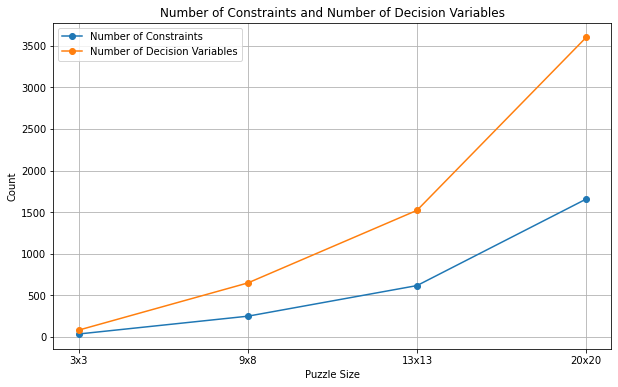

In [7]:
import matplotlib.pyplot as plt

# Data
puzzle_sizes = ["3x3", "9x8", "13x13", "20x20"]
#matrix_complexity = [34, 248, 616, 20]
num_constraints = [34, 248, 616, 1656]
num_decision_variables = [81, 648, 1521, 3600]

# Plotting
plt.figure(figsize=(10, 6))

#plt.plot(puzzle_sizes, matrix_complexity, marker='o', label='Matrix Complexity')
plt.plot(puzzle_sizes, num_constraints, marker='o', label='Number of Constraints')
plt.plot(puzzle_sizes, num_decision_variables, marker='o', label='Number of Decision Variables')

# Adding labels and title
plt.xlabel('Puzzle Size')
plt.ylabel('Count')
plt.title('Number of Constraints and Number of Decision Variables')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

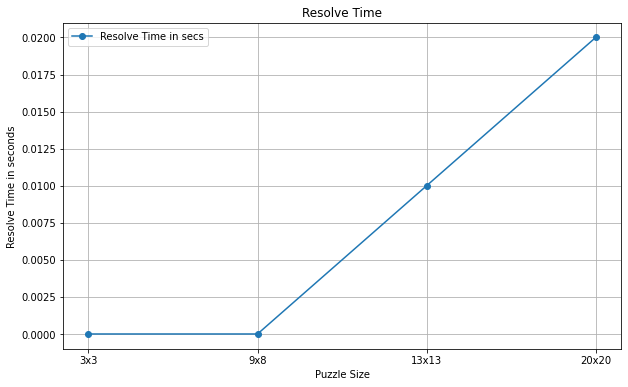

In [8]:
# Resolve Time Code

time = [0.00,0.00,0.01,0.02]
puzzle_sizes = ["3x3", "9x8", "13x13", "20x20"]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(puzzle_sizes, time, marker='o', label='Resolve Time in secs')

plt.xlabel('Puzzle Size')
plt.ylabel('Resolve Time in seconds')
plt.title('Resolve Time')
plt.legend()
plt.legend()

# Display the plot
plt.grid(True)
plt.show()